# Initial EDA

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [2]:
PROJECT_PATH ='/Users/colinsalama/Documents/Projects/metis/project-5'
AGG_PATH = os.path.join(PROJECT_PATH,'data/raw/MSFT_1year_agg.csv')
FIG_PATH = os.path.join(PROJECT_PATH,'reports/figures/')

In [3]:
df = pd.read_csv(AGG_PATH)
df['time'] = pd.to_datetime(df['time'])
df.sort_values(by=['time'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166175 entries, 0 to 166174
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    166175 non-null  datetime64[ns]
 1   open    166175 non-null  float64       
 2   high    166175 non-null  float64       
 3   low     166175 non-null  float64       
 4   close   166175 non-null  float64       
 5   volume  166175 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 7.6 MB


In [4]:
df

,time,open,high,low,close,volume
0,2020-03-16 04:01:00,146.441615,146.441615,143.541095,143.541095,2555
1,2020-03-16 04:02:00,143.056025,143.056025,143.046126,143.046126,463
2,2020-03-16 04:03:00,141.868099,141.868099,141.868099,141.868099,369
3,2020-03-16 04:04:00,141.660212,141.680011,141.660212,141.680011,752
4,2020-03-16 04:05:00,142.541257,142.937233,142.541257,142.937233,1502
...,...,...,...,...,...,...
166170,2021-03-08 19:53:00,228.400000,228.400000,228.400000,228.400000,317
166171,2021-03-08 19:55:00,228.300000,228.300000,228.300000,228.300000,186
166172,2021-03-08 19:56:00,228.300000,228.300000,228.300000,228.300000,474
166173,2021-03-08 19:58:00,228.400000,228.400000,228.400000,228.400000,848


In [5]:
df.describe()

,open,high,low,close,volume
count,166175.000000,166175.000000,166175.000000,166175.000000,1.661750e+05
mean,202.239067,202.325415,202.151312,202.237558,4.698945e+04
std,24.226657,24.216214,24.237330,24.227100,9.714290e+04
min,131.394549,131.602436,131.186662,131.374750,1.000000e+02
25%,184.663647,184.728075,184.586376,184.653245,1.240000e+03
50%,208.318343,208.397949,208.229849,208.309262,2.796900e+04
75%,216.109588,216.174269,216.034589,216.104429,6.178050e+04
max,246.365035,247.133273,245.936019,246.365035,8.085304e+06


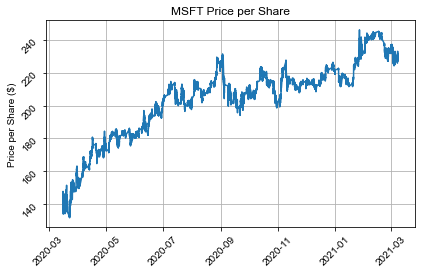

In [6]:
#Init plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['time'],df['close'])

#Style plot
plt.grid(b=True)
ax.set(title='MSFT Price per Share',ylabel='Price per Share ($)')
ax.tick_params(rotation=45)
fig.tight_layout()
sns.set_style("whitegrid")
sns.axes_style("whitegrid")

#Save plot
plt.savefig(os.path.join(FIG_PATH,'MSFT_Price_per_share_1year'),dpi=1200)

In [14]:
# Building features
print (sorted(talib.get_functions()))

['ACOS', 'AD', 'ADD', 'ADOSC', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'ASIN', 'ATAN', 'ATR', 'AVGPRICE', 'BBANDS', 'BETA', 'BOP', 'CCI', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPAR

___
# Testing


In [53]:
MSFT_DATA = 'data/raw/MSFT_intraday_1year/'
MSFT_PATH = os.path.join(PROJECT_PATH,MSFT_DATA)

msft_files = os.listdir(MSFT_PATH)
df = pd.read_csv(os.path.join(MSFT_PATH,msft_files[0]))
print('Size of the df: {0}'.format(len(df.index)))
total = len(df.index)

for file in msft_files[1:]:
    temp_path = os.path.join(MSFT_PATH,file)
    new_df = pd.read_csv(temp_path)
    print('Size of the df: {}'.format(len(new_df.index)))
    total += len(new_df.index)
    df = pd.concat([df,new_df],ignore_index=True)

print('Total rows: {}'.format(total))

Size of the df: 15321
Size of the df: 15064
Size of the df: 13049
Size of the df: 11934
Size of the df: 12648
Size of the df: 13689
Size of the df: 13572
Size of the df: 14327
Size of the df: 14754
Size of the df: 12009
Size of the df: 13751
Size of the df: 16057
Total rows: 166175


In [56]:
total/len(msft_files)

13847.916666666666